In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [4]:
import pandas as pd 
import numpy as np

In [60]:
from SSMuLA.zs_analysis import ZS_OPTS, ZS_COMB_OPTS, ZS_OPTS_LEGEND
from SSMuLA.vis_summary import ZS_COLOR_MAP_APPENDED
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE

In [5]:
# test if emb > oh
mlde = pd.read_csv("results/mlde/vis_5/all_df.csv")

In [7]:
mlde["encoding"].unique()

array(['one-hot', 'esm2_t33_650M_UR50D-flatten_site',
       'esm2_t33_650M_UR50D-mean_all', 'esm2_t33_650M_UR50D-mean_site'],
      dtype=object)

In [32]:
encoding_style = {
    'one-hot': "solid",
    'esm2_t33_650M_UR50D-flatten_site': "dashed",
    'esm2_t33_650M_UR50D-mean_all': "dashdot",
    'esm2_t33_650M_UR50D-mean_site': "dotted"
}

In [8]:
mlde.columns

Index(['encoding', 'model', 'n_sample', 'ft_lib', 'rep', 'all_maxes',
       'all_means', 'top_maxes', 'top_means', 'ndcgs', 'rhos', 'if_truemaxs',
       'truemax_inds', 'n_mut_cutoff', 'lib', 'zs', 'n_top', 'scale_fit'],
      dtype='object')

In [14]:
mlde[mlde["n_top"]==96].set_index(["lib", "zs", "encoding"])

model  n_sample  ft_lib  rep  \
lib   zs                    encoding                                    
DHFR  Triad-esm_score       one-hot   boosting       192    4000    0   
                            one-hot   boosting       192    4000    1   
                            one-hot   boosting       192    4000    2   
                            one-hot   boosting       192    4000    3   
                            one-hot   boosting       192    4000    4   
...                                        ...       ...     ...  ...   
TrpB4 structnmsa-comb_score one-hot      ridge       576   20000   45   
                            one-hot      ridge       576   20000   46   
                            one-hot      ridge       576   20000   47   
                            one-hot      ridge       576   20000   48   
                            one-hot      ridge       576   20000   49   

                                      all_maxes  all_means  top_maxes  \
lib   zs                    encoding                                    
DHFR  Triad-esm_score       one-hot    0.935697   0.153123   0.982530   
                            one-hot    0.813921   0.164246   1.000000   
                            one-hot    0.798997   0.163849   1.000000   
                            one-hot    0.997845   0.157741   1.000000   
                            one-hot    0.752007   0.146420   0.865538   
...                                         ...        ...        ...   
TrpB4 structnmsa-comb_score one-hot    0.402030  -0.046672   0.932034   
                            one-hot    0.413499  -0.030766   0.711605   
                            one-hot    0.392374  -0.011855   0.725586   
                            one-hot    0.366519  -0.045167   0.735563   
                            one-hot    0.451232  -0.014558   0.916559   

                                      top_means     ndcgs      rhos  \
lib   zs                    encoding                                  
DHFR  Triad-esm_score       one-hot    0.451361  0.892434  0.437613   
                            one-hot    0.604757  0.928627  0.482690   
                            one-hot    0.585007  0.931763  0.446393   
                            one-hot    0.549602  0.928540  0.406754   
                            one-hot    0.512380  0.913301  0.445943   
...                                         ...       ...       ...   
TrpB4 structnmsa-comb_score one-hot    0.505388  0.988492  0.230378   
                            one-hot    0.366225  0.986520  0.226638   
                            one-hot    0.372355  0.987562  0.241174   
                            one-hot    0.405292  0.987685  0.246159   
                            one-hot    0.327930  0.986395  0.238162   

                                      if_truemaxs  truemax_inds n_mut_cutoff  \
lib   zs                    encoding                                           
DHFR  Triad-esm_score       one-hot           0.0         199.0          all   
                            one-hot           1.0          88.0          all   
                            one-hot           1.0          82.0          all   
                            one-hot           1.0           0.0          all   
                            one-hot           0.0         520.0          all   
...                                           ...           ...          ...   
TrpB4 structnmsa-comb_score one-hot           0.0          99.0          all   
                            one-hot           0.0        2576.0          all   
                            one-hot           0.0         369.0          all   
                            one-hot           0.0         764.0          all   
                            one-hot           0.0         103.0          all   

                                      n_top scale_fit  
lib   zs                    encoding                   
DHFR  Triad-esm_score       one-hot      96       max  
        

In [36]:
mlde[(mlde["n_top"]==96)&(mlde["zs"].isin(ZS_OPTS))&(mlde["n_mut_cutoff"]=="all")].set_index(["lib", "zs", "encoding"])[["n_sample","top_maxes", "if_truemaxs"]].groupby(["lib", "zs", "encoding", "n_sample"]).agg(["mean", "std"])

top_maxes  \
                                                                 mean   
lib   zs          encoding                         n_sample             
DHFR  Triad_score esm2_t33_650M_UR50D-flatten_site 96        0.887551   
                                                   192       0.908667   
                                                   288       0.915527   
                                                   384       0.920229   
                                                   480       0.924120   
...                                                               ...   
TrpB4 ev_score    one-hot                          384       0.839768   
                                                   480       0.864040   
                                                   576       0.864592   
                                                   960       0.886223   
                                                   1920      0.911577   

                                                                       \
                                                                  std   
lib   zs          encoding                         n_sample             
DHFR  Triad_score esm2_t33_650M_UR50D-flatten_site 96        0.092280   
                                                   192       0.067564   
                                                   288       0.067280   
                                                   384       0.065954   
                                                   480       0.068066   
...                                                               ...   
TrpB4 ev_score    one-hot                          384       0.116966   
                                                   480       0.109322   
                                                   576       0.110192   
                                                   960       0.102219   
                                                   1920      0.093917   

                                                            if_truemaxs  \
                                                                   mean   
lib   zs          encoding                         n_sample               
DHFR  Triad_score esm2_t33_650M_UR50D-flatten_site 96          0.076667   
                                                   192         0.156667   
                                                   288         0.176667   
                                                   384         0.226667   
                                                   480         0.280000   
...                                                                 ...   
TrpB4 ev_score    one-hot                          384         0.230000   
                                                   480         0.290000   
                                                   576         0.293333   
                                                   960         0.340000   
                                                   1920        0.423333   

                                                                       
                                                                  std  
lib   zs          encoding                         n_sample            
DHFR  Triad_score esm2_t33_650M_UR50D-flatten_site 96        0.266506  
                                                   192       0.364094  
                                                   288       0.382024  
                                                   384       0.419375  
                                                   480       0.449749  
...                                                               ...  
TrpB4 ev_score    one-hot                          384       0.421184  
                                                   480       0.454520  
                                                   576       0.456051  
                                                   960       0.474500  
                           

In [69]:
slice_df = (
    mlde[(mlde["n_top"] == 96) & (mlde["zs"].isin(["none"] + ZS_OPTS)) & (mlde["n_mut_cutoff"]=="all")]
    .set_index(["zs", "encoding"])[["n_sample", "top_maxes", "if_truemaxs"]]
    .groupby(["zs", "encoding", "n_sample"])
    .agg(["mean", "std"])
)
slice_df.columns = slice_df.columns.map("_".join)
slice_df = slice_df.reset_index()
slice_df

,zs,encoding,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,Triad_score,esm2_t33_650M_UR50D-flatten_site,96,0.666415,0.345181,0.297222,0.457099
1,Triad_score,esm2_t33_650M_UR50D-flatten_site,192,0.757570,0.311682,0.418889,0.493446
2,Triad_score,esm2_t33_650M_UR50D-flatten_site,288,0.802829,0.285149,0.487222,0.499906
3,Triad_score,esm2_t33_650M_UR50D-flatten_site,384,0.838419,0.260864,0.555278,0.497004
4,Triad_score,esm2_t33_650M_UR50D-flatten_site,480,0.859596,0.244150,0.600000,0.489966
...,...,...,...,...,...,...,...
99,none,one-hot,384,0.747245,0.340636,0.409286,0.491790
100,none,one-hot,480,0.779634,0.323146,0.459286,0.498518
101,none,one-hot,576,0.795640,0.312706,0.483571,0.499909
102,none,one-hot,960,0.842118,0.279887,0.572857,0.494840


In [52]:
ds_df = mlde[(mlde["n_top"] == 96) & (mlde["zs"]=="none") & (mlde["n_mut_cutoff"]=="double")].copy()
ds_df["zs"] = "ed_score"
ds_df

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
1652700,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,0,0.841583,0.186576,1.000000,0.704855,0.959451,0.386621,1.0,10.0,double,DHFR,ed_score,96,max
1652701,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,1,0.857225,0.185362,1.000000,0.732227,0.967116,0.391226,1.0,17.0,double,DHFR,ed_score,96,max
1652702,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,2,0.852774,0.181143,0.996537,0.721951,0.966861,0.386016,0.0,130.0,double,DHFR,ed_score,96,max
1652703,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,3,0.846023,0.188001,1.000000,0.726634,0.963988,0.394607,1.0,17.0,double,DHFR,ed_score,96,max
1652704,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,4,0.849244,0.167622,0.959943,0.687000,0.958187,0.410142,0.0,228.0,double,DHFR,ed_score,96,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726395,one-hot,ridge,1920,2243,45,0.459118,-0.070574,0.742180,0.453682,0.988857,0.233160,0.0,733.0,double,TrpB4,ed_score,96,max
1726396,one-hot,ridge,1920,2243,46,0.502192,-0.044612,0.742180,0.442649,0.988762,0.232063,0.0,558.0,double,TrpB4,ed_score,96,max
1726397,one-hot,ridge,1920,2243,47,0.435301,-0.078705,0.742180,0.443041,0.989154,0.238140,0.0,1199.0,double,TrpB4,ed_score,96,max
1726398,one-hot,ridge,1920,2243,48,0.483840,-0.066038,0.794516,0.454544,0.989159,0.236456,0.0,724.0,double,TrpB4,ed_score,96,max


In [56]:
ds_slice = ds_df.set_index(["zs", "encoding"])[["n_sample", "top_maxes", "if_truemaxs"]].groupby(["zs", "encoding", "n_sample"]).agg(["mean", "std"])
ds_slice.columns = ds_slice.columns.map("_".join)
ds_slice = ds_slice.reset_index()
ds_slice

,zs,encoding,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,ed_score,esm2_t33_650M_UR50D-flatten_site,96,0.733323,0.319617,0.385833,0.486994
1,ed_score,esm2_t33_650M_UR50D-flatten_site,192,0.821147,0.274658,0.550833,0.497617
2,ed_score,esm2_t33_650M_UR50D-flatten_site,288,0.858105,0.242870,0.627500,0.483672
3,ed_score,esm2_t33_650M_UR50D-flatten_site,384,0.884289,0.216644,0.682500,0.465698
4,ed_score,esm2_t33_650M_UR50D-flatten_site,480,0.907945,0.188607,0.730000,0.444145
5,ed_score,esm2_t33_650M_UR50D-flatten_site,576,0.924587,0.166470,0.767500,0.422602
6,ed_score,esm2_t33_650M_UR50D-mean_all,96,0.697072,0.329085,0.301667,0.459173
7,ed_score,esm2_t33_650M_UR50D-mean_all,192,0.755691,0.299012,0.368333,0.482554
8,ed_score,esm2_t33_650M_UR50D-mean_all,288,0.800125,0.274081,0.447500,0.497443
9,ed_score,esm2_t33_650M_UR50D-mean_all,384,0.820606,0.262153,0.493333,0.500164


In [68]:
slice_df["zs"].unique()

array(['Triad_score', 'esm_score', 'esmif_score', 'ev_score'],
      dtype=object)

In [70]:
all_slice = pd.concat([ds_slice, slice_df],axis=0)
all_slice

,zs,encoding,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,ed_score,esm2_t33_650M_UR50D-flatten_site,96,0.733323,0.319617,0.385833,0.486994
1,ed_score,esm2_t33_650M_UR50D-flatten_site,192,0.821147,0.274658,0.550833,0.497617
2,ed_score,esm2_t33_650M_UR50D-flatten_site,288,0.858105,0.242870,0.627500,0.483672
3,ed_score,esm2_t33_650M_UR50D-flatten_site,384,0.884289,0.216644,0.682500,0.465698
4,ed_score,esm2_t33_650M_UR50D-flatten_site,480,0.907945,0.188607,0.730000,0.444145
...,...,...,...,...,...,...,...
99,none,one-hot,384,0.747245,0.340636,0.409286,0.491790
100,none,one-hot,480,0.779634,0.323146,0.459286,0.498518
101,none,one-hot,576,0.795640,0.312706,0.483571,0.499909
102,none,one-hot,960,0.842118,0.279887,0.572857,0.494840


In [71]:
all_slice["zs"].unique()

array(['ed_score', 'Triad_score', 'esm_score', 'esmif_score', 'ev_score',
       'none'], dtype=object)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
ZS_COLOR_MAP_APPENDED

{'none': '#666666',
 'Triad_score': '#4bacc6',
 'ev_score': '#9bbb59',
 'esm_score': '#8064a2',
 'esmif_score': '#ff8888',
 'struc-comb_score': '#849895',
 'msanoif-comb_score': '#9DAE88',
 'msa-comb_score': '#F1D384',
 'structnmsa-comb_score': '#C7B784',
 'double': '#f79646ff',
 'single': '#f9be00'}

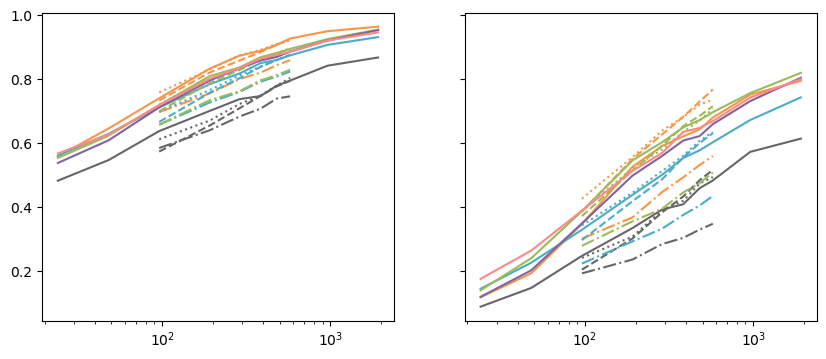

In [74]:
fig, ax = plt.subplots(1,2,  figsize=(10, 4), sharey=True)

for zs in ["none"] + ZS_OPTS:
    if zs == "ed_score":
        c = PRESENTATION_PALETTE_SATURATE["orange"]
    else:
        c = ZS_COLOR_MAP_APPENDED[zs]
    for encoding in all_slice["encoding"].unique():
        slice_df_ = all_slice[
            (all_slice["zs"] == zs) & (all_slice["encoding"] == encoding)
        ]
        ax[0].plot(
            slice_df_["n_sample"],
            slice_df_["top_maxes_mean"],
            color=c,
            linestyle=encoding_style[encoding],
            # label = zs + encoding
        )
        ax[1].plot(
            slice_df_["n_sample"],
            slice_df_["if_truemaxs_mean"],
            color=c,
            linestyle=encoding_style[encoding],
            label = zs + encoding
            )
# ax.set_title(f"zs={zs}")
ax[0].set_xscale("log")
ax[1].set_xscale("log")
# ax.set_xlabel("n_sample")
# ax.set_ylabel("top_maxes")
# ax[1].legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [78]:
for zs in ["none"] + ZS_OPTS:
    for lib in mlde["lib"].unique():
        print(zs, lib)
        # print(mlde[(mlde["lib"] == lib) & (mlde["n_top"] == 96) & (mlde["encoding"] != "one-hot")])
        print(sorted(mlde[(mlde["lib"] == lib) & (mlde["n_top"] == 96) & (mlde["encoding"] != "one-hot") & (mlde["zs"] == zs)]["n_sample"].unique()))

none DHFR
[96, 192, 288, 384, 480, 576]
none GB1
[96, 192, 288, 384, 480, 576]
none ParD2
[]
none ParD3
[]
none TrpB3A
[96, 192, 288, 384, 480, 576]
none TrpB3B
[96, 192, 288, 384, 480, 576]
none TrpB3C
[96, 192, 288, 384, 480, 576]
none TrpB3D
[96, 192, 288, 384, 480, 576]
none TrpB3E
[96, 192, 288, 384, 480, 576]
none TrpB3F
[96, 192, 288, 384, 480, 576]
none TrpB3G
[96, 192, 288, 384, 480, 576]
none TrpB3H
[96, 192, 288, 384, 480, 576]
none TrpB3I
[96, 192, 288, 384, 480, 576]
none TrpB4
[96, 192, 288, 384, 480, 576]
ed_score DHFR
[]
ed_score GB1
[]
ed_score ParD2
[]
ed_score ParD3
[]
ed_score TrpB3A
[]
ed_score TrpB3B
[]
ed_score TrpB3C
[]
ed_score TrpB3D
[]
ed_score TrpB3E
[]
ed_score TrpB3F
[]
ed_score TrpB3G
[]
ed_score TrpB3H
[]
ed_score TrpB3I
[]
ed_score TrpB4
[]
Triad_score DHFR
[96, 192, 288, 384, 480, 576]
Triad_score GB1
[96, 192, 288, 384, 480, 576]
Triad_score ParD2
[]
Triad_score ParD3
[]
Triad_score TrpB3A
[96, 192, 288, 384, 480, 576]
Triad_score TrpB3B
[96, 192, 288